In [48]:
# load cifar10 data

from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Flatten, Dropout
import keras

In [50]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(GlobalAveragePooling2D())

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [52]:
# just use a part of training data

# NO PREPROCESSING

import keras

x_train1 = x_train[0:1280]
y_train1 = keras.utils.to_categorical(y_train[0:1280], 10) 
x_valid1 = x_test[0:100]
y_valid1 = keras.utils.to_categorical(y_test[0:100], 10) 


model1 = get_model()
history1 = model1.fit(x_train1, y_train1, batch_size=64, epochs=20, shuffle=False, validation_data=(x_valid1, y_valid1))

Train on 1280 samples, validate on 100 samples
Epoch 1/20
1280/1280 [==============================] - 4s 3ms/step - loss: 5.7142 - acc: 0.0984 - val_loss: 2.2951 - val_acc: 0.0600
Epoch 2/20
1280/1280 [==============================] - 3s 2ms/step - loss: 2.2937 - acc: 0.1102 - val_loss: 2.2772 - val_acc: 0.1800
Epoch 3/20
1280/1280 [==============================] - 3s 2ms/step - loss: 2.2536 - acc: 0.1555 - val_loss: 2.1566 - val_acc: 0.2700
Epoch 4/20
1280/1280 [==============================] - 3s 2ms/step - loss: 2.1274 - acc: 0.1852 - val_loss: 2.0278 - val_acc: 0.1600
Epoch 5/20
1280/1280 [==============================] - 3s 2ms/step - loss: 2.0759 - acc: 0.2062 - val_loss: 1.9405 - val_acc: 0.3800
Epoch 6/20
1280/1280 [==============================] - 3s 2ms/step - loss: 2.0102 - acc: 0.2562 - val_loss: 1.9233 - val_acc: 0.3500
Epoch 7/20
1280/1280 [==============================] - 3s 2ms/step - loss: 1.9539 - acc: 0.2492 - val_loss: 1.9151 - val_acc: 0.2900
Epoch 8/20
1280

In [54]:
# PREPROCESSING: zero-center

import keras

x_train2 = x_train[0:1280] - 127.0
y_train2 = keras.utils.to_categorical(y_train[0:1280], 10) 
x_valid2 = x_test[0:100] - 127.0
y_valid2 = keras.utils.to_categorical(y_test[0:100], 10) 

model2 = get_model()
history2 = model2.fit(x_train2, y_train2, batch_size=64, epochs=20, shuffle=False, validation_data=(x_valid2, y_valid2))

Train on 1280 samples, validate on 100 samples
Epoch 1/20
1280/1280 [==============================] - 4s 3ms/step - loss: 3.4207 - acc: 0.1133 - val_loss: 2.3003 - val_acc: 0.1200
Epoch 2/20
1280/1280 [==============================] - 3s 2ms/step - loss: 2.2861 - acc: 0.1117 - val_loss: 2.2289 - val_acc: 0.1700
Epoch 3/20
1280/1280 [==============================] - 3s 2ms/step - loss: 2.1508 - acc: 0.2055 - val_loss: 2.0469 - val_acc: 0.3200
Epoch 4/20
1280/1280 [==============================] - 3s 2ms/step - loss: 2.0260 - acc: 0.2211 - val_loss: 1.9711 - val_acc: 0.3800
Epoch 5/20
1280/1280 [==============================] - 3s 2ms/step - loss: 1.9543 - acc: 0.2375 - val_loss: 2.0081 - val_acc: 0.3000
Epoch 6/20
1280/1280 [==============================] - 3s 2ms/step - loss: 1.8782 - acc: 0.2703 - val_loss: 1.9118 - val_acc: 0.3500
Epoch 7/20
1280/1280 [==============================] - 3s 2ms/step - loss: 1.8293 - acc: 0.2711 - val_loss: 2.0223 - val_acc: 0.2600
Epoch 8/20
1280

In [57]:
# PREPROCESSING: scaling

import keras

x_train3 = x_train[0:1280] / 255.0
y_train3 = keras.utils.to_categorical(y_train[0:1280], 10) 
x_valid3 = x_test[0:100] / 255.0
y_valid3 = keras.utils.to_categorical(y_test[0:100], 10)

model3 = get_model()
history3 = model3.fit(x_train3, y_train3, batch_size=64, epochs=20, shuffle=False, validation_data=(x_valid3, y_valid3))

Train on 1280 samples, validate on 100 samples
Epoch 1/20
1280/1280 [==============================] - 8s 7ms/step - loss: 2.3058 - acc: 0.1086 - val_loss: 2.3012 - val_acc: 0.1600
Epoch 2/20
1280/1280 [==============================] - 7s 6ms/step - loss: 2.2911 - acc: 0.1211 - val_loss: 2.2339 - val_acc: 0.1800
Epoch 3/20
1280/1280 [==============================] - 7s 6ms/step - loss: 2.2237 - acc: 0.1680 - val_loss: 2.1445 - val_acc: 0.2700
Epoch 4/20
1280/1280 [==============================] - 7s 6ms/step - loss: 2.1585 - acc: 0.1836 - val_loss: 2.1159 - val_acc: 0.2300
Epoch 5/20
1280/1280 [==============================] - 7s 6ms/step - loss: 2.1051 - acc: 0.2133 - val_loss: 2.0553 - val_acc: 0.2500
Epoch 6/20
1280/1280 [==============================] - 7s 6ms/step - loss: 2.0674 - acc: 0.2141 - val_loss: 2.0242 - val_acc: 0.2800
Epoch 7/20
1280/1280 [==============================] - 7s 6ms/step - loss: 2.0165 - acc: 0.2211 - val_loss: 1.9516 - val_acc: 0.3500
Epoch 8/20
1280

In [56]:
# PREPROCESSING: zero-center + scaling

import keras

x_train4 = (x_train[0:1280] - 127.0) / 127.0
y_train4 = keras.utils.to_categorical(y_train[0:1280], 10)

x_valid4 = (x_test[0:100] - 127.0) / 127.0
y_valid4 = keras.utils.to_categorical(y_test[0:100], 10) 

model4 = get_model()
history4 = model4.fit(x_train4, y_train4, batch_size=64, epochs=20, shuffle=False, validation_data=(x_valid4, y_valid4))

Train on 1280 samples, validate on 100 samples
Epoch 1/20
1280/1280 [==============================] - 6s 4ms/step - loss: 2.2451 - acc: 0.1391 - val_loss: 2.0393 - val_acc: 0.3500
Epoch 2/20
1280/1280 [==============================] - 5s 4ms/step - loss: 2.0239 - acc: 0.1984 - val_loss: 1.9613 - val_acc: 0.3300
Epoch 3/20
1280/1280 [==============================] - 5s 4ms/step - loss: 1.9436 - acc: 0.2430 - val_loss: 1.8757 - val_acc: 0.3600
Epoch 4/20
1280/1280 [==============================] - 5s 4ms/step - loss: 1.8774 - acc: 0.2625 - val_loss: 1.8129 - val_acc: 0.3600
Epoch 5/20
1280/1280 [==============================] - 5s 4ms/step - loss: 1.8202 - acc: 0.2945 - val_loss: 1.7465 - val_acc: 0.3900
Epoch 6/20
1280/1280 [==============================] - 5s 4ms/step - loss: 1.7634 - acc: 0.3187 - val_loss: 1.7230 - val_acc: 0.3900
Epoch 7/20
1280/1280 [==============================] - 4s 4ms/step - loss: 1.7150 - acc: 0.3586 - val_loss: 1.6925 - val_acc: 0.3500
Epoch 8/20
1280

Text(0.5, 1.0, 'Training loss')

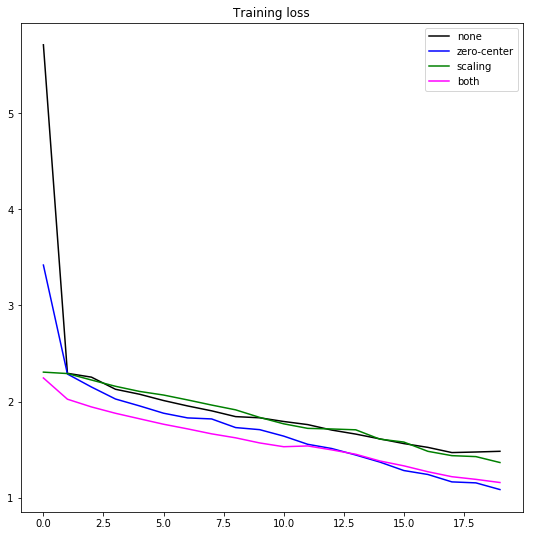

In [89]:
%matplotlib inline

import matplotlib.pyplot as plt

x = [i for i in range(20)]

# loss curves for 4 models
plt.figure(figsize=(9, 9))

l = plt.plot(x, history1.history['loss'])
plt.setp(l, color='black', ls='-', label='none')

l = plt.plot(x, history2.history['loss'])
plt.setp(l, color='blue', ls='-', label='zero-center')

l = plt.plot(x, history3.history['loss'])
plt.setp(l, color='green', ls='-', label='scaling')

l = plt.plot(x, history4.history['loss'])
plt.setp(l, color='magenta', ls='-', label='both')


plt.legend(loc='upper right')
plt.title('Training loss')

Text(0.5, 1.0, 'Training accuracy')

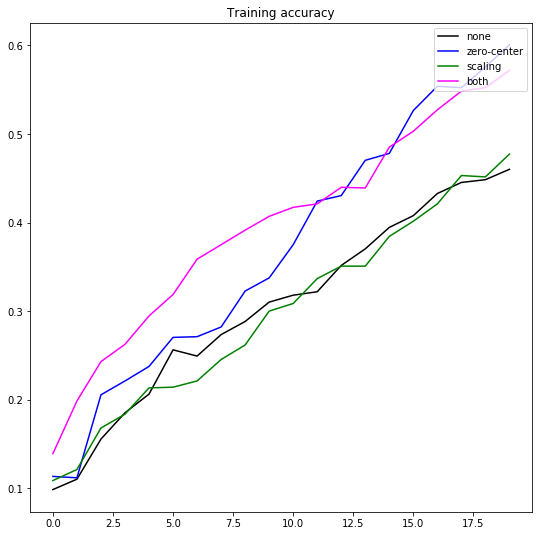

In [90]:
%matplotlib inline

import matplotlib.pyplot as plt

x = [i for i in range(20)]

# loss curves for 4 models
plt.figure(figsize=(9, 9))

l = plt.plot(x, history1.history['acc'])
plt.setp(l, color='black', ls='-', label='none')

l = plt.plot(x, history2.history['acc'])
plt.setp(l, color='blue', ls='-', label='zero-center')

l = plt.plot(x, history3.history['acc'])
plt.setp(l, color='green', ls='-', label='scaling')

l = plt.plot(x, history4.history['acc'])
plt.setp(l, color='magenta', ls='-', label='both')


plt.legend(loc='upper right')
plt.title('Training accuracy')

Text(0.5, 1.0, 'Valid accuracy')

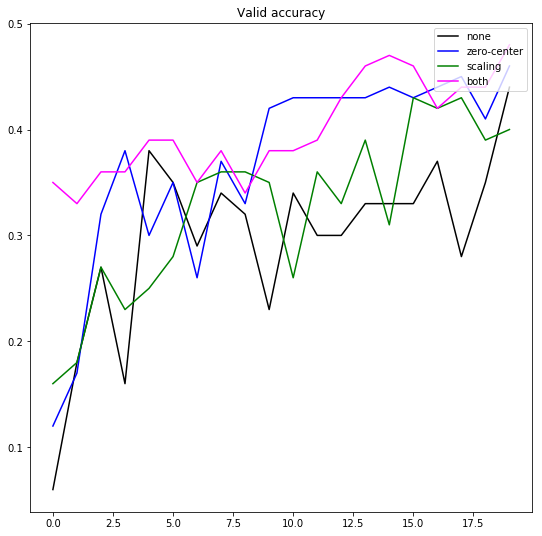

In [91]:
%matplotlib inline

import matplotlib.pyplot as plt

x = [i for i in range(20)]

# loss curves for 4 models
plt.figure(figsize=(9, 9))

l = plt.plot(x, history1.history['val_acc'])
plt.setp(l, color='black', ls='-', label='none')

l = plt.plot(x, history2.history['val_acc'])
plt.setp(l, color='blue', ls='-', label='zero-center')

l = plt.plot(x, history3.history['val_acc'])
plt.setp(l, color='green', ls='-', label='scaling')

l = plt.plot(x, history4.history['val_acc'])
plt.setp(l, color='magenta', ls='-', label='both')


plt.legend(loc='upper right')
plt.title('Valid accuracy')